# Customer survey on age reversing medicine EDA

The company `veva.co` sells a brand of supplements that support healthy ageing and longevity.

This kernel is an in depth analysis of `206 response SurveyMonkey` which are provided by the company to identify the attributes of consumers who are most likely to buy their products, so that we can design an efficient marketing strategy, targeting the right channels, interest groups and demographies with a compelling message that delivers high return on marketing investment.

You can read a `report` on the `findings` on my [GitHub](https://github.com/AkashSDas/customer-survey-on-age-reversing-medicine-eda) account and the `dataset` is available on [Kaggle](https://www.kaggle.com/akashsdas/customer-survey-on-age-reversing-medicine).

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support 
# Use pip or conda to install xlrd.

# !pip install xlrd

# ValueError: Your version of xlrd is 2.0.1. In xlrd >= 2.0, only the xls format is supported. 
# Install openpyxl instead.

!pip install openpyxl

     |████████████████████████████████| 243 kB 864 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=a83c96b03ff418d3b8b6cc922a021c827010c26ea8d27204288cc3933da84510
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


In [3]:
# Loading the dataset
dataset_path = '../input/customer-survey-on-age-reversing-medicine/data.xlsx'
df = pd.read_excel(dataset_path, index_col=0)
df.head()

,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,custom_value8,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Would you like to learn about ways to increase your lifespan and healthspan?,Age,Gender,Household Income,Region,Device Type
Respondent ID,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Technology - Wearables,Travel - General,Travel - Road trips,Other (please specify),Response,Response,Response,Response,Response,Response
1.225055e+10,397836384.0,2020-12-11 14:57:31,2020-12-11 14:59:10,NaN,NaN,NaN,NaN,dad0c96e72515175075d280b8f,smc,NaN,...,NaN,Travel - General,NaN,NaN,Yes - Visit us at veva.co or write an email to...,18-29,Male,"$0-$9,999",Pacific,iOS Phone / Tablet
1.225055e+10,397836384.0,2020-12-11 14:51:23,2020-12-11 14:56:51,NaN,NaN,NaN,NaN,c5855af0d1dbb8f8733e4416ac,smc,NaN,...,NaN,Travel - General,Travel - Road trips,NaN,Yes - Visit us at veva.co or write an email to...,> 60,Female,"$0-$9,999",Mountain,Android Phone / Tablet
1.225053e+10,397836384.0,2020-12-11 14:47:23,2020-12-11 14:48:36,NaN,NaN,NaN,NaN,b46b06a02e7de1eb37ddc8fb57,smc,NaN,...,NaN,NaN,NaN,NaN,No,45-60,Female,"$75,000-$99,999",Middle Atlantic,iOS Phone / Tablet
1.225052e+10,397836384.0,2020-12-11 14:43:38,2020-12-11 14:44:36,NaN,NaN,NaN,NaN,c317ba8b7402b71abb8df36fe2,smc,NaN,...,NaN,NaN,NaN,NaN,No,30-44,Male,"$50,000-$74,999",West North Central,Android Phone / Tablet


## 🪂 Data preparation

In [4]:
# Refactoring the column names
def refactor_column_names(df, inplace=False):
    first_headers = df.columns.tolist()

    # There are actually two headers, the 1st header is the actual header
    # and the 2nd header is in the 1st row.
    second_headers = df.iloc[0].tolist()

    final_headers = []
    for idx, header in enumerate(first_headers):
        if ('Unnamed' in header):
            final_headers.append(second_headers[idx])
        else:
            final_headers.append(header)

    # changing the name of the header with the final headers
    headers = {
        header: final_headers[index]
        for index, header in enumerate(first_headers)
    }
    return df.rename(columns=headers, inplace=inplace)


refactor_column_names(df, True)

In [5]:
# Chaning the index
df['Index'] = [i for i in range(len(df))]
df.set_index('Index', inplace=True)

# Removing the 1st row
df.drop([0], inplace=True)

In [6]:
# Dropping unnecessary columns
unnecessary_columns = [
    'Collector ID',
    'Start Date',
    'End Date',
    'IP Address',
    'Email Address',
    'First Name',
    'Last Name',
    'Custom Data 1',
    'collector_type_source',
    'custom_value8',
    'custom_value9',
    'custom_value7'
]
df.drop(unnecessary_columns, axis='columns', inplace=True)

### Cleaning column values

In [7]:
df_columns = df.columns.tolist()
print(len(df_columns))

74


`Column: One day, advances in science and medicine will stop or reverse the human ageing process`.

In [8]:
def refactor_column_0(df, col_name):
    column = df[col_name].tolist()
    for idx, value in enumerate(column):
        if type(value) != int:
            df[col_name].iloc[idx] = int(value.split(' ')[0])
        else:
            df[col_name].iloc[idx] = value


refactor_column_0(df, df_columns[0])

`Column: I believe vitamins, supplements, or medications available today can slow, stop or reverse the ageing process`.

In [9]:
def refactor_column_1(df, col_name):
    return refactor_column_0(df, col_name)


refactor_column_1(df, df_columns[1])

`Column: If it were available today, the most I would spend on a supplement that slows, stops, or reverses my ageing`.

In [10]:
def refactor_column_2(df, col_name):
    column = df[col_name].tolist()
    for idx, value in enumerate(column):
        amount = [string for string in value.split(' ') if '$' in string][0]
        amount = ''.join(amount.split('$'))
        if ('/' in amount):
            amount = ''.join(amount.split('/')[0])
        df[col_name].iloc[idx] = int(amount)


refactor_column_2(df, df_columns[2])

`Column: I tend to be among the first of my friends to try new products, services, technologies, etc`.

In [11]:
def refactor_column_3(df, col_name):
    return refactor_column_0(df, col_name)


refactor_column_3(df, df_columns[3])

`Column: I am interested in the following`. This columns name should be `Beauty - General`.

In [12]:
df.rename(columns={df_columns[4]: 'Beauty - General'}, inplace=True)
df_columns = df.columns.tolist()  # updating column list


def refactor_column_4(df, col_name):
    column = df[col_name].tolist()
    for idx, value in enumerate(column):
        if type(value) == float:
            df[col_name].iloc[idx] = 0
        else:
            df[col_name].iloc[idx] = 1


refactor_column_4(df, df_columns[4])

Since the remaining column from the below list also have same problem we can use the `refactor_column_4` function for all of them.

In [13]:
BINARY_COLUMNS = [
    'Beauty',
    'Books',
    'Design',
    'Family',
    'Fitness',
    'Games',
    'Health',
    'News',
    'Nutrition',
    'Politics',
    'Science',
    'Social',
    'Sports',
    'Technology',
    'Travel'
]

for header in df_columns:
    if header.split(' ')[0] in BINARY_COLUMNS:
        refactor_column_4(df, header)

`Column: Other (please specify)`

In [14]:
col_name = 'Other (please specify)'
print(df[col_name].unique())
print(df[col_name].value_counts())

# Since the "Other (please specify)" column has very few values and those
# values are unique therefore dropping the column
df.drop([col_name], axis='columns', inplace=True)
df_columns = df.columns.tolist()  # updating columns list

[nan 'baseball, board games' 'Crafts' 'Creativity, Innovation, Business'
 'law']
law                                 1
Crafts                              1
Creativity, Innovation, Business    1
baseball, board games               1
Name: Other (please specify), dtype: int64


`Column: 'Would you like to learn about ways to increase your lifespan and healthspan?'`

In [15]:
col_name = 'Would you like to learn about ways to increase your lifespan and healthspan?'
print(list(df[col_name].unique()))


def _refactor(df, col_name):
    column = df[col_name].tolist()
    for idx, value in enumerate(column):
        if 'Yes' in value:
            df[col_name].iloc[idx] = 1
        else:
            df[col_name].iloc[idx] = 0


_refactor(df, col_name)

['Yes - Visit us at veva.co or\xa0write\xa0an email to care@veva.co and we will send you our research on healthy aging.', 'No']


`Column: Household Income`

In [16]:
def refactor_household_column(df):
    col_name = 'Household Income'
    # print(df[col_name].unique())

    new_values = {
        'Prefer not to answer': -1,
        '$0-$9,999': 1,
        '$10,000-$24,999': 2,
        '$25,000-$49,999': 3,
        '$50,000-$74,999': 4,
        '$75,000-$99,999': 5,
        '$100,000-$124,999': 6,
        '$125,000-$149,999': 7,
        '$150,000-$174,999': 8,
        '$175,000-$199,999': 9,
        '$200,000+': 10
    }
    df[col_name] = df[col_name].apply(lambda x: new_values[x])


refactor_household_column(df)

`Column: Region`

In [17]:
def refactor_region_column(df):
    col_name = 'Region'
    # print(df[col_name].unique())

    new_values = {
        'Pacific': 1,
        'Mountain': 2,
        'Middle Atlantic': 3,
        'West North Central': 4,
        'South Atlantic': 5,
        'East North Central': 6,
        'West South Central': 7,
        'New England': 8,
        'East South Central': 9
    }

    for idx, value in enumerate(df[col_name]):
        if type(value) == str:
            df[col_name].iloc[idx] = new_values[value]
        else:
            df[col_name].iloc[idx] = -1


refactor_region_column(df)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
REGIONS = {
    'Pacific': 1,
    'Mountain': 2,
    'Middle Atlantic': 3,
    'West North Central': 4,
    'South Atlantic': 5,
    'East North Central': 6,
    'West South Central': 7,
    'New England': 8,
    'East South Central': 9
}

## 🎙 Exploratory Data Analysis

Let's explore the data.

![](https://media.giphy.com/media/1SvsA7ypPi78fH2ZvG/giphy.gif)

In [19]:
def df_count_plot(df, col_name):
    fig_dims = (16, 6)
    _, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=col_name, data=df, ax=ax)

**Variable for long column headers**

In [20]:
# people who believe that in future science is capable
future_believe = 'One day, advances in science and medicine will stop or reverse the human aging process.'

# people who believe that today science is capable
today_believe = 'I believe vitamins, supplements, or medications available today can slow, stop or reverse the aging process.'

# people who are willing to buy the porduct if it's avilable today
willingness_to_buy_today = 'If it were available today, the most I would spend on a supplement that slows, stops, or reverses my aging:'

# people who want to buy first
want_to_try_first = 'I tend to be among the first of my friends to try new products, services, technologies, etc.'

# people who want to learn
want_to_learn = 'Would you like to learn about ways to increase your lifespan and healthspan?'

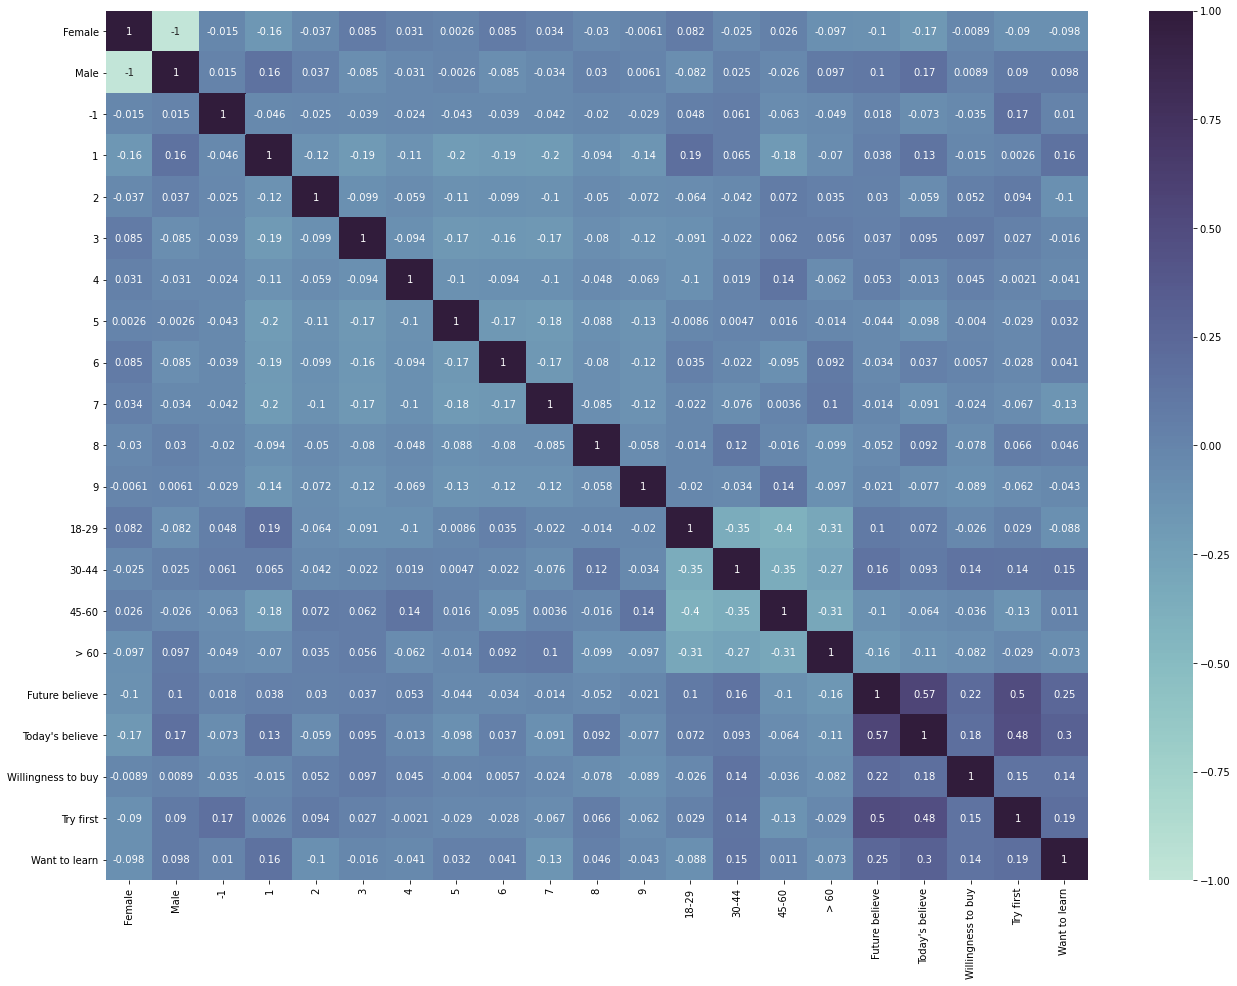

In [21]:
def get_corr(df):
    f_series = pd.Series(df[future_believe].values.tolist())
    t_series = pd.Series(df[today_believe].values.tolist())
    willingess_series = pd.Series(df[willingness_to_buy_today].values.tolist())
    _try_first_series = pd.Series(df[want_to_try_first].values.tolist())
    learn_series = pd.Series(df[want_to_learn].values.tolist())
    gender_df = pd.get_dummies(df['Gender'])
    region_df = pd.get_dummies(df['Region'])
    age_df = pd.get_dummies(df['Age'])
    household_income_series = pd.Series(df['Household Income'].values.tolist())
    
    series_df = pd.DataFrame({
        'Future believe': f_series,
        'Today\'s believe': t_series,
        'Willingness to buy': willingess_series,
        'Try first': _try_first_series,
        'Want to learn': learn_series
    })
    df_corr = pd.concat([gender_df, region_df, age_df, series_df], axis=1).corr()
    plt.figure(figsize=(22, 16))
    sns.heatmap(df_corr, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
    
    
get_corr(df)

### ❓ Finding answers to questions

![](https://media.giphy.com/media/Mfvjabj51UiQM/giphy.gif)

In [22]:
def get_percent(of, total):
    return round(of / total, 2) * 100

`Total number of people`

In [23]:
num_of_people = len(df)

num_of_male = len(df[df['Gender'] == 'Male'])
num_of_female = len(df[df['Gender'] == 'Female'])

`avg of how much people believe in product's future`

In [24]:
print(df[future_believe].mean()) # 1 - 10

4.966019417475728


`avg of how much people believe that product is available today`

In [25]:
print(df[today_believe].mean()) # 1 - 10

4.970873786407767


`avg of how much people are ready to spend if the product is available today`

In [26]:
print(f'On average people are ready to spend ${round(df[willingness_to_buy_today].mean(), 2)} if the product is available today') # $

On average people are ready to spend $74.22 if the product is available today


`avg of how much people want to try first`

In [27]:
print(df[want_to_try_first].mean()) # 1 - 10

4.936893203883495


Percentage of who want to learn: 45.0%


<AxesSubplot:xlabel='Would you like to learn about ways to increase your lifespan and healthspan?', ylabel='count'>

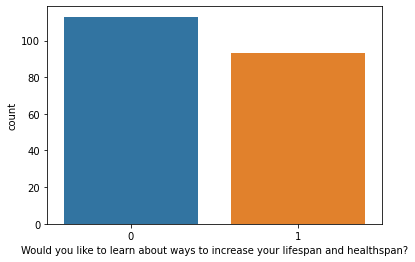

In [28]:
# how many people want to learn of this product/science
want_to = df[df[want_to_learn] == 1][want_to_learn].count()
# print(want_to)

# people who don't want to
dont_want_to = df[df[want_to_learn] == 0][want_to_learn].count()
# print(dont_want_to)

print(f'Percentage of who want to learn: {get_percent(want_to, num_of_people)}%')
sns.countplot(x=want_to_learn, data=df)

`what is the avg household income`

In [29]:
print(df[df['Household Income'] > 0]['Household Income'].mean()) # $42499.3

3.739130434782609


<AxesSubplot:xlabel='Household Income', ylabel='count'>

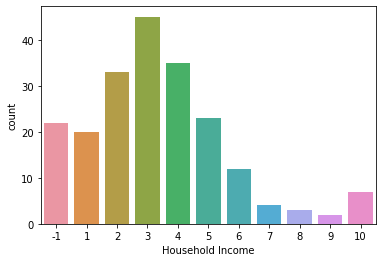

In [30]:
sns.countplot(x='Household Income', data=df)

### Question related to the gender column

`number of male and female in the suvery`

Female    118
Male       88
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

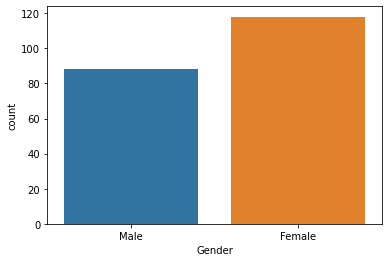

In [31]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)

`Gender wise future believe`

In [32]:
# male
male = len(df[(df[future_believe] > 5) & (df['Gender'] == 'Male')])
print(f'{round(get_percent(male, num_of_male), 2)}% of male believe in future of the product')

# female
female = len(df[(df[future_believe] > 5) & (df['Gender'] == 'Female')])
print(f'{get_percent(female, num_of_female)}% of female believe in future of the product')

56.0% of male believe in future of the product
33.0% of female believe in future of the product


`Gender wise today believe`

In [33]:
# male
male = len(df[(df[today_believe] > 5) & (df['Gender'] == 'Male')])
print(f'{get_percent(male, num_of_male)}% of male believe that the technology/product is available today')

# female
female = len(df[(df[today_believe] > 5) & (df['Gender'] == 'Female')])
print(f'{get_percent(female, num_of_female)}% of female believe that the technology/product is available today')

41.0% of male believe that the technology/product is available today
38.0% of female believe that the technology/product is available today


`Gender wise who will spend more`

In [34]:
# male
male_amount = df[df['Gender'] == 'Male'][willingness_to_buy_today].mean()
print(f'Male will spend ${male_amount} if the product is available today')

# female
female_amount = df[df['Gender'] == 'Female'][willingness_to_buy_today].mean()
print(f'Female will spend ${round(female_amount, 2)} if the product is available today')

Male will spend $73.75 if the product is available today
Female will spend $74.58 if the product is available today


`Gender wise who want's to try first`

In [35]:
# male
male = len(df[(df[want_to_try_first] > 5) & (df['Gender'] == 'Male')])
print(f'{get_percent(male, num_of_male)}% of male want\' to try the product first')

# female
female = len(df[(df[want_to_try_first] > 5) & (df['Gender'] == 'Female')])
print(f'{get_percent(female, num_of_female)}% of female want\' to try the product first')

47.0% of male want' to try the product first
36.0% of female want' to try the product first


`Gender wise who want to learn`

In [36]:
# male
male = len(df[(df[want_to_learn] == 1) & (df['Gender'] == 'Male')])
print(f'{get_percent(male, num_of_male)}% of males want to learn about the science/product')

# female
female = len(df[(df[want_to_learn] == 1) & (df['Gender'] == 'Female')])
print(f'{get_percent(female, num_of_female)}% of females want to learn about the science/product')

43.0% of males want to learn about the science/product
47.0% of females want to learn about the science/product


`Gender wise avg Household Income`

In [37]:
# male
male_amount = df[df['Gender'] == 'Male']['Household Income'].mean()
print(round(male_amount, 2))

# female
female_amount = df[df['Gender'] == 'Female']['Household Income'].mean()
print(round(female_amount, 2))

print()

print(f'$37,499.5 is the average household income of male')
print(f'$23,499.1 is the average household income of female')

3.59
2.97

$37,499.5 is the average household income of male
$23,499.1 is the average household income of female


### Question related to household income column

`Which income range is more interested in the product?`

In [38]:
# future
income_range = df[df[future_believe] > 5]['Household Income'].mean()
print(income_range) # $32,499.7

3.340909090909091


In [39]:
# today
income_range = df[df[today_believe] > 5]['Household Income'].mean()
print(income_range) # $23,499.1

2.962962962962963


`willingness to buy (how much an income grp is ready to spend)`

In [40]:
higger_income_grp = df['Household Income'] > 5
spending = df[higger_income_grp][willingness_to_buy_today].mean()
print(f'Higher income group is ready to spend ${round(spending, 2)}')

lower_income_grp = df['Household Income'] <= 5
no_ans = df['Household Income'] != -1  # didn't disclosed their income
spending = df[lower_income_grp & no_ans][willingness_to_buy_today].mean()
print(f'Lower income group is ready to spend ${round(spending, 2)}')

Higher income group is ready to spend $98.39
Lower income group is ready to spend $72.92


### Question related to region column

In [41]:
unique_regions = df.Region.unique().tolist()
unique_regions.remove(-1)  # removing nan values

def value2key(dictonary, value):
    for key, val in dictonary.items():
        if value == val:
            return key

In [42]:
regions = []
f_believe_list = []
t_believe_list = []
_try_list = []
spending_list = []
learn_list = []

for region in unique_regions:
    spending = df[df.Region == region][willingness_to_buy_today].mean()
    f_believe = df[df.Region == region][future_believe].mean()
    t_believe = df[df.Region == region][today_believe].mean()
    _try = df[df.Region == region][want_to_try_first].mean()

    learn = df[df.Region == region][want_to_learn].value_counts()
    learn_0, learn_1 = learn[0], learn[1]

    f_str = f'future believe: {round(f_believe, 1)}'
    t_str = f'today believe: {round(t_believe, 2)}'
    tr_str = f'want to try: {round(_try, 2)}'
    l_str = f'want to learn: {round(learn_1 / (learn_1 + learn_0) * 100, 2)}%'
    spending_str = f'spending: ${round(spending, 2)}'
    
    regions.append(value2key(REGIONS, region))
    f_believe_list.append(round(f_believe, 1))
    t_believe_list.append(round(t_believe, 1))
    _try_list.append(round(_try, 1))
    learn_list.append(round(learn_1 / (learn_1 + learn_0) * 100, 2))
    spending_list.append(round(spending, 2))

    print(
        f'''
        *** {value2key(REGIONS, region)} ***
        {f_str} 
        {t_str} 
        {tr_str} 
        {l_str} 
        {spending_str}

        '''
    )


        *** Pacific ***
        future believe: 5.5 
        today believe: 5.14 
        want to try: 4.97 
        want to learn: 37.84% 
        spending: $78.51

        

        *** Mountain ***
        future believe: 4.2 
        today believe: 4.42 
        want to try: 3.92 
        want to learn: 50.0% 
        spending: $82.92

        

        *** Middle Atlantic ***
        future believe: 4.6 
        today believe: 4.61 
        want to try: 4.57 
        want to learn: 35.71% 
        spending: $96.61

        

        *** West North Central ***
        future believe: 4.6 
        today believe: 5.18 
        want to try: 4.45 
        want to learn: 54.55% 
        spending: $123.64

        

        *** South Atlantic ***
        future believe: 5.2 
        today believe: 5.03 
        want to try: 5.18 
        want to learn: 45.45% 
        spending: $38.94

        

        *** East North Central ***
        future believe: 4.7 
        today believe: 4.36 

In [43]:
def plot_barh_sorted_range(_x, _y, x_label, y_label):
    x = []
    y = []

    # remove nan
    for idx, val in enumerate(_x):
        if str(val) != 'nan':
            x.append(_x[idx])
            y.append(_y[idx])
    
    sorted_pairs = sorted(zip(x, y))
    tuples = zip(*sorted_pairs)
    x, y = [ list(tuple) for tuple in  tuples]
    plt.barh(y, x, color='#65b87b', alpha=.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

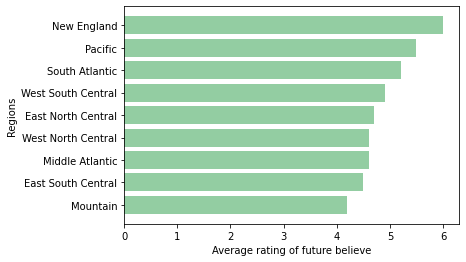

In [44]:
plot_barh_sorted_range(f_believe_list, regions, 'Average rating of future believe', 'Regions')

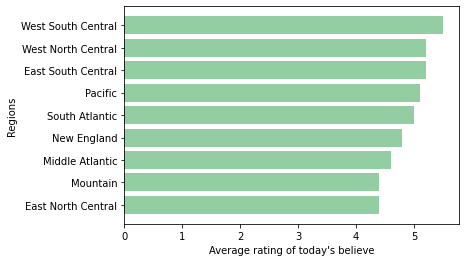

In [45]:
plot_barh_sorted_range(t_believe_list, regions, 'Average rating of today\'s believe', 'Regions')

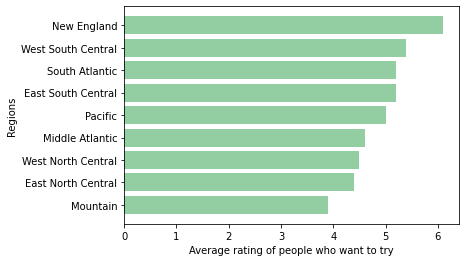

In [46]:
plot_barh_sorted_range(_try_list, regions, 'Average rating of people who want to try', 'Regions')

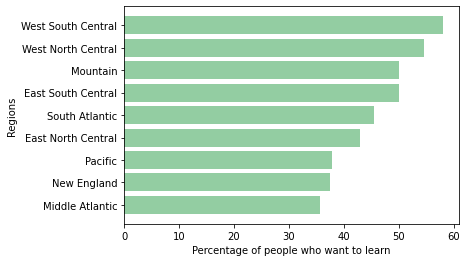

In [47]:
plot_barh_sorted_range(learn_list, regions, 'Percentage of people who want to learn', 'Regions')

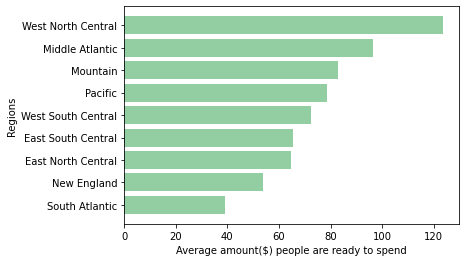

In [48]:
plot_barh_sorted_range(spending_list, regions, 'Average amount($) people are ready to spend', 'Regions')

### Question related to remaining fields (columns)

In [49]:
df_columns = df.columns.tolist()

BINARY_COLUMNS = [
    'Beauty - General',
    'Beauty - Fashion',
    'Beauty - Makeup',
    'Beauty - Skincare',
    'Books - General',
    'Books - Non-fiction',
    'Books - Fiction',
    'Design - General',
    'Design - Architecture',
    'Design - Graphic',
    'Design - Interior',
    'Family - General',
    'Fitness - General',
    'Fitness - Aerobics',
    'Fitness - Biking',
    'Fitness - Crossfit & Interval Training',
    'Games - General',
    'Games - Dungeons and Dragons',
    'Games - Fortnite',
    'Games - Minecraft',
    'Games - MMORPGs',
    'Health - General',
    'Health - Meditation and Mindfulness',
    'Health - Sauna & Steamrooms',
    'Health - Sleep',
    'News - General',
    'News - Newspapers',
    'News - Journals',
    'News - Social media',
    'News - Cable',
    'Nutrition - General',
    'Nutrition - Fasting',
    'Nutrition - Mediterranean diets',
    'Nutrition - Ketogenic & Gluten Free diets',
    'Politics - General',
    'Politics - Conservative',
    'Politics - Liberal',
    'Science - General',
    'Science - Longevity research',
    'Social media - General',
    'Social media - Facebook',
    'Social media - Instagram',
    'Social media - Twitter',
    'Social media - Tik Tok',
    'Social media - WhatsApp',
    'Sports - General',
    'Sports - Backpacking',
    'Sports - Hunting',
    'Sports - Fly fishing',
    'Sports - Marathons, triathlons, distance races, etc.',
    'Sports - Motocross, snowmobiles, ATVs',
    'Sports - NFL',
    'Sports - Yoga',
    'Technology - General',
    'Technology - 3D printing',
    'Technology - Artificial Intelligence',
    'Technology - Programming',
    'Technology - Quantified Self',
    'Technology - Robotics',
    'Technology - Smart Home, IoT, etc',
    'Technology - Wearables',
    'Travel - General',
    'Travel - Road trips',
]

len(BINARY_COLUMNS)

63

In [50]:
headers = []
f_believe_list = []
t_believe_list = []
_try_list = []
spending_list = []
learn_list = []
reponse_percentage_list = []

for i in [1, 0]:
    for h in BINARY_COLUMNS:  # h == header
        spending = df[df[h] == i][willingness_to_buy_today].mean()
        f_believe = df[df[h] == i][future_believe].mean()
        t_believe = df[df[h] == i][today_believe].mean()
        _try = df[df[h] == i][want_to_try_first].mean()

        learn = df[df[h] == i][want_to_learn].value_counts()
        try:
            learn_0, learn_1 = learn[0], learn[1]
        except:
            try:
                learn_0 = learn[0]
            except:
                learn_0 = 0
                try:
                    learn_1 = learn[1]
                except:
                    learn_1 = 0

        # reponse percent
        rp_per = round(len(df[df[h] == i]) / len(df[h]) * 100, 2)
        rp_per_str = f'reponse percent: {rp_per}%'

        f_str = f'future believe: {round(f_believe, 2)}'
        t_str = f'today believe: {round(t_believe, 2)}'
        tr_str = f'want to try: {round(_try, 2)}'

        if (learn_0 != 0 and learn_1 != 0):
            _learn = round(learn_1 / (learn_1 + learn_0) * 100, 2)
            l_str = f'want to learn: {_learn}%'
        else:
            _learn = 0
            l_str = f'want to learn: {_learn}%'

        spending_str = f'spending: {round(spending, 2)}'
        
        headers.append(f'{i} - {h}')
        reponse_percentage_list.append(rp_per)
        f_believe_list.append(round(f_believe, 2))
        t_believe_list.append(round(t_believe, 2))
        _try_list.append(round(_try, 2))
        spending_list.append(round(spending, 2))
        learn_list.append(_learn)
        
#         print(
#             f'''
#             *** {i} - {h} ***
#             {rp_per_str}
#             {f_str} 
#             {t_str} 
#             {tr_str} 
#             {l_str} 
#             {spending_str}

#             '''
#         )

In [51]:
def plot_barh_sorted_range_with_slice(_x, _y, _slice, x_label, y_label):
    x = []
    y = []
    # remove nan
    for idx, val in enumerate(_x):
        if str(val) != 'nan':
            x.append(_x[idx])
            y.append(_y[idx])
    
    print(f'**** Top {_slice} ****')
    sorted_pairs = sorted(zip(x, y))
    tuples = zip(*sorted_pairs)
    x, y = [ list(tuple) for tuple in  tuples]
    
    plt.barh(y[-_slice:], x[-_slice:], color='#706dbd', alpha=.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [52]:
TOP = 10

**** Top 10 ****


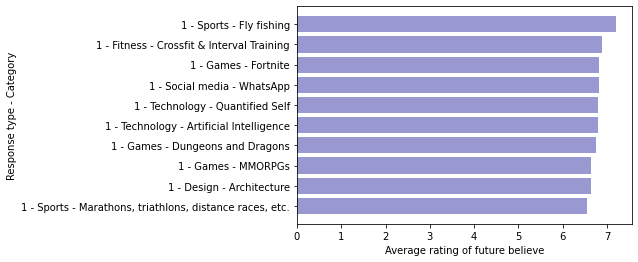

In [53]:
plot_barh_sorted_range_with_slice(f_believe_list, headers, TOP, 'Average rating of future believe', 'Response type - Category')

**** Top 10 ****


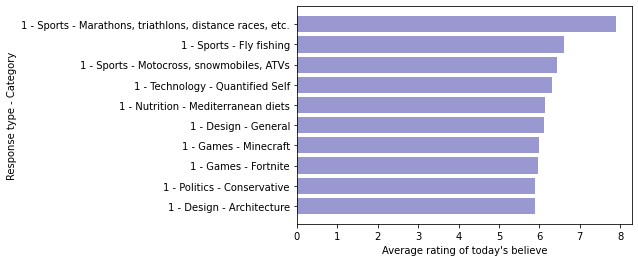

In [54]:
plot_barh_sorted_range_with_slice(t_believe_list, headers, TOP, 'Average rating of today\'s believe', 'Response type - Category')

**** Top 10 ****


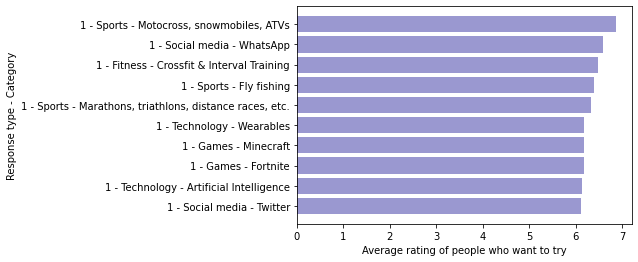

In [55]:
plot_barh_sorted_range_with_slice(_try_list, headers, TOP, 'Average rating of people who want to try', 'Response type - Category')

**** Top 10 ****


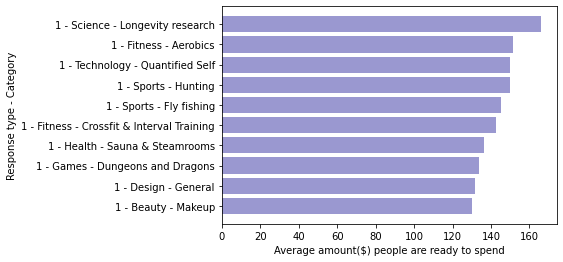

In [56]:
plot_barh_sorted_range_with_slice(spending_list, headers, TOP, 'Average amount($) people are ready to spend', 'Response type - Category')

**** Top 10 ****


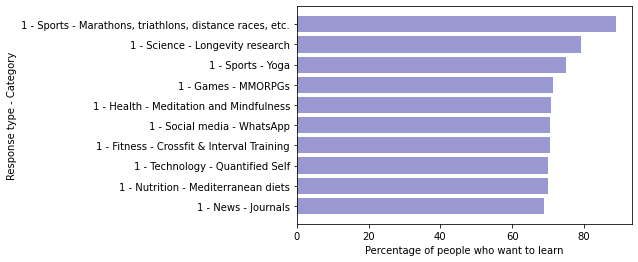

In [57]:
plot_barh_sorted_range_with_slice(learn_list, headers, TOP, 'Percentage of people who want to learn', 'Response type - Category')

---

I'll wrap things up there. If you want to find some other answers then go ahead `edit` this kernel. If you have any `questions` then do let me know.

If this kernel helped you then don't forget to 🔼 `upvote` and share your 🎙 `feedback` on improvements of the kernel.

![](https://media.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif)

---